# Wealth distribution model

### The aim of this notebook is to represent a stochastic cell automata model for explaining the quasy exponential (Pareto) nature of wealth distribution of world. 



![alt-text][Income]

[Income]: https://d33wubrfki0l68.cloudfront.net/28f2cd1b5f4b804f146d99975a7e10ee5e73db0f/8e4a6/wp-content/uploads/2013/11/global-inc-distribution-2003-and-2013-linear-scale-1-750x525.png "Income distribution on normal scale"

![alt-text][Log income]

[Log income]: https://d33wubrfki0l68.cloudfront.net/42b09ac448bda1fccb0df7ad48eb0989ceef136f/b1a8c/wp-content/uploads/2013/11/global-inc-distribution-2003-and-2013-1-750x525.png "Logarithmic income distribution"


![alt-text][Eve]

[Eve]: https://i.redd.it/eyqbtnq1qmvx.png "Eve , MMORPG wealth distribution"


![alt-text][Bitcoin]

[Bitcoin]: https://cdn-images-1.medium.com/max/1200/1*U_6rNMoDctStIkUBzwupCg.png "Bitcoin(cryptocurrency) wealth distribution"


![alt-text][Family]

[Family]: https://apps.urban.org/features/wealth-inequality-charts/img/WealthPercentiles.jpg "Family wealth distribution"


 # Assumptions of the model
 
 * One step is one exchange between two randomly selected participants ( Alice and Bob )
 
 * The exchange is zero sum. As much one pays, that much the other gains
 
 * There are a fixed amount of participants
 
 * Each participant starts equal, with minimum initial perturbation
 
 * The maximum amount of exchange value is limited by a percentage of the total value of lower value participant.
  
 * The probability distribution of the exchange direction is slightly skewed toward the higher value participant, depending on the difference of wealths



In [68]:
#Importing libraries and defining the functions
%matplotlib notebook
import scipy
import matplotlib as mpl
import numpy as np
import random

arraysize = 500
Participants = np.ones((arraysize))*100 + np.random.rand((arraysize))/100

def tradeValue(participant_A, participant_B):
    return min(participant_A, participant_B)

def exchangeFactor():
    return (random.random()-1/2)*0.3

def tradeSkew(participant_A, participant_B):
    valueRatio = np.abs(participant_A - participant_B) / (np.abs(participant_A - participant_B)+1)
    skewedRatio = valueRatio*0.2*np.sign(participant_A - participant_B)
    return random.random()-0.5+skewedRatio
    

def evolutionStep(participants):
    indexA = random.randint(0,len(participants)-1)
    indexB = random.randint(0,len(participants)-1)
    exchangeValue = tradeValue(participants[indexA], participants[indexB]) * \
        exchangeFactor() * tradeSkew(participants[indexA], participants[indexB])
    participants[indexA] += exchangeValue
    participants[indexB] -= exchangeValue
    return exchangeValue

def simulate(arraysize=15000, stepnumber=100000):
    tradeHistory=[]
    Participants = np.ones((arraysize))*100 + np.random.rand((arraysize))/10000
    for i in range(stepnumber):
        tradeValue=(evolutionStep(Participants))
        
    return ( Participants , tradeHistory )

In [92]:
#Run the simulation
arraysize = 5000, stepnumber= 10000000
results=simulate(arraysize = 5000, stepnumber= 10000000)

<IPython.core.display.Javascript object>


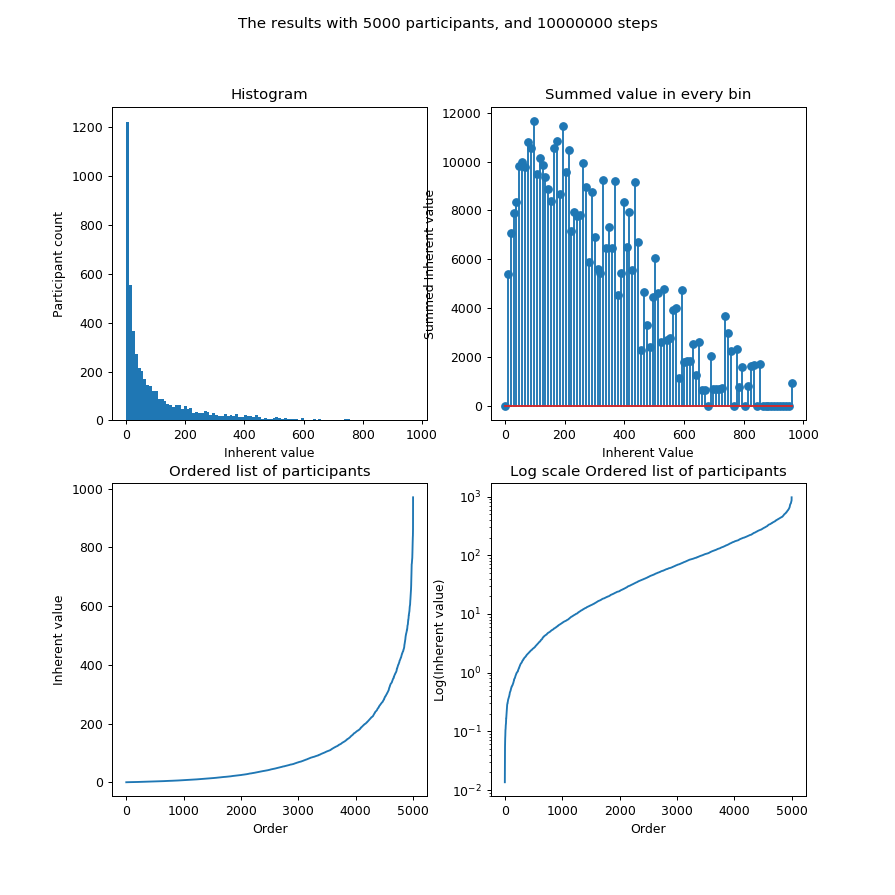

In [100]:
#Plot out the results
arraysize = 5000
stepnumber= 10000000
fig, ax = mpl.pyplot.subplots(2,2,figsize=(10,10))
title="The results with " + str(arraysize) + " participants, and " + str(stepnumber) + " steps"
fig.suptitle(title)

hist=ax[0,0].hist(results[0], bins=100)
ax[0,0].set_title("Histogram")
ax[0,0].set_xlabel("Inherent value")
ax[0,0].set_ylabel("Participant count")

ax[0,1].stem(hist[1][0:-1],np.multiply(hist[0],hist[1][0:-1]))
ax[0,1].set_title("Summed value in every bin")
ax[0,1].set_ylabel("Summed Inherent value")
ax[0,1].set_xlabel("Inherent Value")

ax[1,0].plot(sorted(results[0]))
ax[1,0].set_title("Ordered list of participants")
ax[1,0].set_ylabel("Inherent value")
ax[1,0].set_xlabel("Order")

ax[1,1].plot(sorted(results[0]))
ax[1,1].set_title("Log scale Ordered list of participants")
ax[1,1].set_ylabel("Log(Inherent value)")
ax[1,1].set_xlabel("Order")

ax[1,1].set_yscale('log')


<p>The results indicate there is a similarity with the above mentioned cases.</p>

<p>I would like to highlight, that the exchange represented here can be of something intrinsic value which can overlap with currency, but also can represent a more extended concept( involving power, assets, resources, energy, etc...)</p>

<p>The model can also be valid in other cellular type exchange based systems (biological, physical, informational, ...).</p>

<p>The model indicates that this is a systemic feature.</p>

<p>The model can be an indicator to borrow solutions from nature to create stable systems.</p>

<p>I would like to reference to works of [Pareto](https://en.wikipedia.org/wiki/Pareto_distribution)</p>

<p>I would like to point out the low end and the high end of the distribution where the rate of change becomes super exponential. The black swan effect.</p>


``` 
credits go to :
        - the creators and owners of the referred images
        - creators of the Python tools being used 
```